In [1]:
import random
import numpy as np
import torch
import os
import pathlib
import pickle

In [2]:
data_generation_process = "SPO_Data_Generation"
# data_generation_process = "DDR_Data_Generation"

In [3]:
current_directory = os.getcwd()
parent_directory = os.path.dirname(current_directory)
grandparent_directory = os.path.dirname(parent_directory)
DataPath = os.path.dirname(grandparent_directory) + '/Data/MacBook_' + data_generation_process + "/"
pathlib.Path(DataPath).mkdir(parents=True, exist_ok=True)
print("grandparent_directory:", grandparent_directory)
print("DataPath:", DataPath)

grandparent_directory: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Code_MacBook
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data/MacBook_SPO_Data_Generation/


# Parameters

In [4]:
# import pyepo
# generate data
grid = (5,5) # grid size
num_train = 50 # number of training data
num_feat = 5 # size of feature
num_test = 1000
deg = 1.0 # polynomial degree
e = 1.0 # noise width

lower = 0 # coef lower bound
upper = 1 # coef upper bound
p = 5 # num of features
d = 40 # num of arcs
alpha = 1.0 # scale of normal std or the range of uniform. For the error term
mis = deg # model misspecification


In [5]:
DataPath = DataPath + "data_size="+str(num_train)+"_deg="+str(deg)+"_e="+str(e)+"/"
pathlib.Path(DataPath).mkdir(parents=True, exist_ok=True)

In [7]:
def Prepare_Data(DataPath,lower, upper, p, d, coef_seed,seed_all,num_test, num_train, alpha,mis,data_generation_process):
# #  ****** Coef generation *********
    from Data import data_generation
    data_gen = data_generation()
    # print("W_star = ",W_star[0,:])
    W_star = data_gen.generate_truth("",lower, upper, p, d, coef_seed,version = 0) 

    for seed in seed_all:
        DataPath_seed = DataPath +"Seed="+str(seed)+"/"
        pathlib.Path(DataPath_seed).mkdir(parents=True, exist_ok=True)
        # #  ****** Data generation *********
        x_test, c_test, x_train, c_train, W_star = data_gen.generate_samples(seed,DataPath_seed,p, d, num_test, num_train, alpha, W_star, mis, thres = 10, 
                                version = data_generation_process, x_dist = 'normal', e_dist = 'normal', x_low = 0, x_up = 2, x_mean = 2, x_var = 0.25, bump = 0) 
        print()

In [ ]:
coef_seed = 2
seed_all = np.arange(1,3)
Prepare_Data(DataPath,lower, upper, p, d, coef_seed,seed_all,num_test, num_train, alpha,mis,data_generation_process)

In [9]:
from SPO_Plus import shortestPathModel
SPM = shortestPathModel()
arcs = SPM._getArcs()

Set parameter Username

--------------------------------------------
--------------------------------------------

Academic license - for non-commercial use only - expires 2025-03-25


# Oracle

In [10]:
def Implement_Oracle(DataPath,seed_all):
    cost_Oracle_all = {}
    for seed in seed_all:
        DataPath_seed = DataPath +"Seed="+str(seed)+"/"
        pathlib.Path(DataPath_seed).mkdir(parents=True, exist_ok=True)
        with open(DataPath_seed+'Data.pkl', "rb") as tf:
            Data = pickle.load(tf)
        c_test = Data["c_test"]
        from Peformance import performance_evaluation
        perfs = performance_evaluation()
        cost_Oracle_all[seed] = perfs.compute_Oracel_Cost(arcs, grid,c_test)
        print("*** seed = ",seed," Average Oracle Cost = ",np.mean(cost_Oracle_all[seed]))
        with open(DataPath_seed +'rst_Oracle.pkl', "wb") as tf:
            pickle.dump(cost_Oracle_all[seed],tf)
    return cost_Oracle_all

In [11]:
cost_Oracle_all = Implement_Oracle(DataPath,seed_all)

*** seed =  1  Average Oracle Cost =  5.789756910705729
*** seed =  2  Average Oracle Cost =  5.706931208938956


# EPO approaches, including SPO+,PG,LTR and ...

In [12]:
def Implement_EPO(DataPath,seed_all,batch_size,num_epochs,method_names):
    cost_EPO = {}
    from PYEPO import PyEPO_Method
    epo_runner = PyEPO_Method()
    # batch_size = 20
    # num_epochs = 30
    for seed in seed_all:
        DataPath_seed = DataPath +"Seed="+str(seed)+"/"
        pathlib.Path(DataPath_seed).mkdir(parents=True, exist_ok=True)
        cost_EPO[seed] = epo_runner.run(method_names,DataPath_seed,batch_size,num_feat,grid,num_epochs)
    return cost_EPO

In [13]:
batch_size = 20
num_epochs = 30
method_names = ["spo+","pg","ltr"]
cost_EPO_all = Implement_EPO(DataPath,seed_all,batch_size,num_epochs,method_names)

Optimizing for optDataset...


100%|██████████| 50/50 [00:00<00:00, 1460.91it/s]


Optimizing for optDataset...


100%|██████████| 1000/1000 [00:00<00:00, 2102.05it/s]

=========== Run SPO =============


Num of cores: 2
epoch =  0 cost =  9.149511917524643
epoch =  1 cost =  9.161244721566
epoch =  2 cost =  9.16586338334591
epoch =  3 cost =  9.169867951542743
epoch =  4 cost =  9.162056982070462
epoch =  5 cost =  9.162313940164422
epoch =  6 cost =  9.161331838917707
epoch =  7 cost =  9.134464706266089
epoch =  8 cost =  9.133659865232906
epoch =  9 cost =  9.151298950592311
epoch =  10 cost =  9.153513150176288
epoch =  11 cost =  9.163790211023668
epoch =  12 cost =  9.158283574180583
epoch =  13 cost =  9.158502439203577
epoch =  14 cost =  9.148300616344342
epoch =  15 cost =  9.162024084704369
epoch =  16 cost =  9.158978995972102
epoch =  17 cost =  9.164355500359342
epoch =  18 cost =  9.178696322975934
epoch =  19 cost =  9.176400024215015
epoch =  20 cost =  9.180442560407588
epoch =  21 cost =  9.18897064382421
epoch =  22 cost =  9.205422790155524
epoch =  23 cost =  9.204088761859351
epoch =  24 cost =  9.212279345258848
epoch =  25 cost =  9.226902754141728
epoch =  26

100%|██████████| 50/50 [00:00<00:00, 1233.23it/s]


Optimizing for optDataset...


100%|██████████| 1000/1000 [00:00<00:00, 2084.96it/s]


=========== Run SPO =============
Num of cores: 2
epoch =  0 cost =  9.208047387127758
epoch =  1 cost =  9.202598213449637
epoch =  2 cost =  9.200908734627586
epoch =  3 cost =  9.191680312257311
epoch =  4 cost =  9.193731542103043
epoch =  5 cost =  9.19287271687766
epoch =  6 cost =  9.19673548633983
epoch =  7 cost =  9.201149321353114
epoch =  8 cost =  9.184112293943814
epoch =  9 cost =  9.192958452747254
epoch =  10 cost =  9.180769495997628
epoch =  11 cost =  9.175072191816806
epoch =  12 cost =  9.16560106291534
epoch =  13 cost =  9.166406677586078
epoch =  14 cost =  9.162844290173663
epoch =  15 cost =  9.15312373217247
epoch =  16 cost =  9.147287232112657
epoch =  17 cost =  9.149300884282733
epoch =  18 cost =  9.152722188933337
epoch =  19 cost =  9.136098418580884
epoch =  20 cost =  9.12856156757898
epoch =  21 cost =  9.135790056494582
epoch =  22 cost =  9.143199456104478
epoch =  23 cost =  9.14488748836278
epoch =  24 cost =  9.134878845808496
epoch =  25 cost

In [ ]:
seed = 2
print("SPO = ",np.mean(cost_EPO_all[seed]["SPO"]),", PG = ",np.mean(cost_EPO_all[seed]["PG"]), ", LTR = ",np.mean(cost_EPO_all[seed]["LTR"]))

SPO =  9.115752571475161 , PG =  9.016929217968748 , LTR =  9.144327784948945


# OLS 

In [21]:
def Implement_OLS(DataPath,seed_all,arcs,grid):
    cost_OLS_all = {}
    for seed in seed_all:
        DataPath_seed = DataPath +"Seed="+str(seed)+"/"
        pathlib.Path(DataPath_seed).mkdir(parents=True, exist_ok=True)

        from OLS import run_OLS_Shortest_Path
        OLS_runner = run_OLS_Shortest_Path()
        cost_OLS_all[seed] = OLS_runner.run(DataPath_seed,arcs,grid)
        print("*** seed = ",seed," Average OLS Cost = ",np.mean(cost_OLS_all[seed]))
    return cost_OLS_all

In [22]:
cost_OLS_all = Implement_OLS(DataPath,seed_all,arcs,grid)

*** seed =  1  Average OLS Cost =  9.258242699766951
*** seed =  2  Average OLS Cost =  8.862625838915589


# DDR 

In [25]:
from DDR import run_DDR_Shortest_Path
DDR_runner = run_DDR_Shortest_Path()
mu_arr = np.arange(0.025,1.0,0.05)
lamb_arr = np.arange(0.75,1.251,0.125)
cost_DDR_all = {}
for seed in seed_all:
    DataPath_seed = DataPath +"Seed="+str(seed)+"/"
    pathlib.Path(DataPath_seed).mkdir(parents=True, exist_ok=True)
    print("*** seed = ",seed,": Run DDR ========")
    cost_DDR_all[seed] = DDR_runner.run(DataPath_seed,lamb_arr,mu_arr,arcs, grid,num_nodes=25)

*** seed =  1 : Run DDR ========
lambda =  0.75 , mu =  0.025 , Average DDR cost =  9.072871957195154
lambda =  0.75 , mu =  0.07500000000000001 , Average DDR cost =  9.12549936353363
lambda =  0.75 , mu =  0.12500000000000003 , Average DDR cost =  9.106086396278803
lambda =  0.75 , mu =  0.17500000000000004 , Average DDR cost =  9.124458173906639
lambda =  0.75 , mu =  0.22500000000000003 , Average DDR cost =  9.132592592397563
lambda =  0.75 , mu =  0.275 , Average DDR cost =  9.173426808335302
lambda =  0.75 , mu =  0.32500000000000007 , Average DDR cost =  9.157483570664889
lambda =  0.75 , mu =  0.37500000000000006 , Average DDR cost =  9.180256110416206
lambda =  0.75 , mu =  0.4250000000000001 , Average DDR cost =  9.192710079602636
lambda =  0.75 , mu =  0.4750000000000001 , Average DDR cost =  9.221926819719767
lambda =  0.75 , mu =  0.5250000000000001 , Average DDR cost =  9.23972142153398
lambda =  0.75 , mu =  0.5750000000000001 , Average DDR cost =  9.263256355240959
lambd

# Implement different approaches

# Results

In [29]:
cost_OLS_avg = 0; cost_SPO_avg = 0; cost_Oracle_avg = 0; cost_DDR_avg = np.zeros((len(lamb_arr),len(mu_arr)))
for seed in seed_all:
    cost_ddr_opt = 10000
    lamb_opt = 0
    mu_opt = 0
    ddr_ols_ratio = 0

    cost_Oracle_avg = cost_Oracle_avg + np.mean(cost_Oracle_all[seed])
    cost_OLS_avg = cost_OLS_avg + np.mean(cost_OLS_all[seed])
    cost_SPO_avg = cost_SPO_avg + np.mean(cost_EPO_all[seed]["SPO"]) 
    lamb_index = 0
    for lamb in lamb_arr:
        mu_index = 0
        for mu in mu_arr:
            # print("Seed = ",seed,", lamb_opt = ",lamb,",mu_opt = ",mu,", Average DRR Cost = ", np.round(np.mean(cost_DDR_all[seed][lamb,mu]["cost"]),4))
            if np.mean(cost_DDR_all[seed][lamb,mu]["cost"]) < cost_ddr_opt:
                cost_ddr_opt = np.mean(cost_DDR_all[seed][lamb,mu]["cost"])
                lamb_opt = lamb
                mu_opt = mu
                ddr_ols_ratio = (np.mean(cost_OLS_all[seed]) - cost_ddr_opt)/(np.mean(cost_OLS_all[seed]) - np.mean(cost_Oracle_all[seed]))
                ddr_spo_ratio = ((np.mean(cost_EPO_all[seed]["SPO"])) - cost_ddr_opt)/(np.mean(cost_EPO_all[seed]["SPO"]) - np.mean(cost_Oracle_all[seed]))
            cost_DDR_avg[lamb_index,mu_index] = cost_DDR_avg[lamb_index,mu_index] + np.mean(cost_DDR_all[seed][lamb,mu]["cost"])
            mu_index = mu_index + 1
        lamb_index = lamb_index + 1
    print("Seed = ",seed,", lamb_opt = ",lamb_opt,",mu_opt = ",mu_opt, \
          ",DDR_OLS_ratio = ",np.round(ddr_ols_ratio,4), ",DDR_SPO_ratio = ",np.round(ddr_spo_ratio,4))


Seed =  1 , lamb_opt =  0.875 ,mu_opt =  0.07500000000000001 ,DDR_OLS_ratio =  0.0595 ,DDR_SPO_ratio =  0.0464
Seed =  2 , lamb_opt =  0.875 ,mu_opt =  0.9250000000000002 ,DDR_OLS_ratio =  0.0076 ,DDR_SPO_ratio =  0.0813


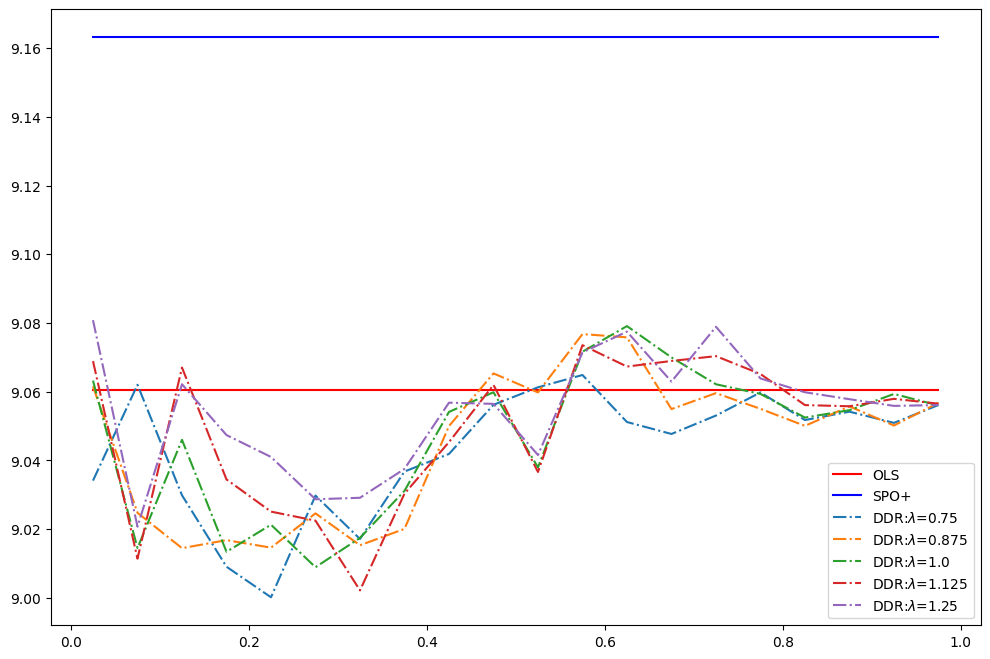

In [30]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(12, 8))
# ax.plot(mu_arr,np.ones(len(mu_arr))*cost_Oracle_avg/len(seed_all),'-',color = 'k',label="Oracle")
ax.plot(mu_arr,np.ones(len(mu_arr))*cost_OLS_avg/len(seed_all),'-',color = 'r',label="OLS")
ax.plot(mu_arr,np.ones(len(mu_arr))*cost_SPO_avg/len(seed_all),'-',color = 'b',label="SPO+")

lamb_index = 0
for lamb in lamb_arr:
    name = r"DDR:$\lambda$="+str(lamb)
    ax.plot(mu_arr,cost_DDR_avg[lamb_index,:]/len(seed_all),'-.',label=name)
    lamb_index = lamb_index + 1
ax.legend()

plt.show()

In [ ]:
def cross_compare2plus(c_item, c_base, c_oracle):
    c_item = np.asarray(c_item)
    c_base = np.asarray(c_base)
    c_oracle = np.asarray(c_oracle)

    N = len(c_item)
    c_diff = c_item - c_base
    lbel = np.zeros((N,1))
    
    equals = np.sum(c_diff == 0)
    wins = np.sum(c_diff < 0)
    lose = np.sum(c_diff > 0)
    
    lbel[c_diff < 0] = 1
    lbel[c_diff > 0] = -1
    
    print(N, equals, wins, lose)
    print("base cost = ", np.mean(c_base),",item cost = ",np.mean(c_item))
    if N == equals:
        win_ratio = 0.5
    else:
        win_ratio = wins/(N - equals)
    cost_reduction = (np.mean(c_base) - np.mean(c_item) )/np.abs(np.mean(c_oracle))
    regret_reduction = (np.mean(c_base) - np.mean(c_item))/np.abs(np.mean(c_base) - np.mean(c_oracle))
    return lbel, win_ratio, cost_reduction, regret_reduction

In [ ]:
seed = 3
lbel, win_ratio, cost_spo_ols, regret_spo_ols = cross_compare2plus(cost_SPO_all[seed],cost_OLS_all[seed], cost_Oracle_all[seed])

In [ ]:
def calculate_comparison(file_name,perf_eva,c_item, c_base, c_oracle,ypio):
    if ypio == 0:
#     # compares results
        lbels, h2h, mci = perf_eva.cross_compare2(c_item, c_base, c_oracle)
        store_results(file_name,lbels=lbels,h2h=h2h,mci=mci)
        print("h2h = ",h2h)
    else:
        # compares results plus
        lbels, h2h, mci, pio = perf_eva.cross_compare2plus(c_item, c_base, c_oracle)
        store_results(file_name,lbels=lbels,h2h=h2h,mci=mci,pio=pio)
        print("h2h = ",h2h," pio = ",pio)
    # return lbels, h2h, mci